In [14]:
import numpy as np
import seaborn as sns
from math import exp, sqrt
import matplotlib.pyplot as plt

In [15]:
def exp_eigv(E, Sigma=None):
    if Sigma is None:
        Sigma = np.identity(np.shape(E)[0])
    x = E[0,0]
    y = E[0,1]
    z = E[1,1]
    a = Sigma[0,0]
    b = Sigma[1,1]
    delta = a**2 * z**2 - 2*a*b*x*z + 4*a*b*y**2 + b**2 * x**2
    exp_lambda1 = exp((-sqrt(delta)+a*z+b*z)/(2*a*b))
    exp_lambda2 = exp((sqrt(delta)+a*z+b*z)/(2*a*b))
    p = a * (exp_lambda1*(sqrt(delta)+a*z-b*x) + exp_lambda2*(sqrt(delta)-a*z+b*x)) / (2*sqrt(delta))
    q = b * (exp_lambda1*(sqrt(delta)-a*z+b*x) + exp_lambda2*(sqrt(delta)+a*z-b*x)) / (2*sqrt(delta))
    r = (a*b*y) * (-exp_lambda1+exp_lambda2) / (sqrt(delta))
    # print(np.array([[p, r],[r, q]]))
    mu1 = (-sqrt(p**2-2*p*q+q**2+4*r**2)+p+q)/2
    mu2 = (sqrt(p**2-2*p*q+q**2+4*r**2)+p+q)/2
    return mu2, mu1

In [16]:
def gen_GOE(d):
    B = np.random.randn(d,d)
    return (B + B.T) / 2
    
def exp_sigma(E, Sigma=None):
    if Sigma is None:
        Sigma = np.identity(np.shape(E)[0])
    X = np.linalg.solve(Sigma, E) # for general square matrices
    D, V = np.linalg.eig(X)
    L = np.diag(np.exp(D))
    return Sigma @ V @ L @ np.linalg.inv(V)

In [17]:
X = gen_GOE(2)
X = np.array([[-1, 0.5], [0.5, -1]])
print(X)
Sigma = np.array([[2,0],[0,1]])
exp_X = exp_sigma(X, Sigma)
print(exp_X)
np.linalg.eigvals(exp_X)

[[-1.   0.5]
 [ 0.5 -1. ]]
[[1.27832791 0.24363351]
 [0.24363351 0.39553045]]


array([1.34110189, 0.33275646])

In [18]:
exp_eigv(X, Sigma)

(1.3411018899577885, 0.33275646215881904)

In [19]:
larger_evs = []
smaller_evs = []
for i in range(100000):
    X = gen_GOE(2)
    Sigma = np.array([[1,0],[0,1]])
    mu1, mu2 = exp_eigv(X, Sigma)
    larger_evs.append(mu1)
    smaller_evs.append(mu2)
all_evs = larger_evs + smaller_evs

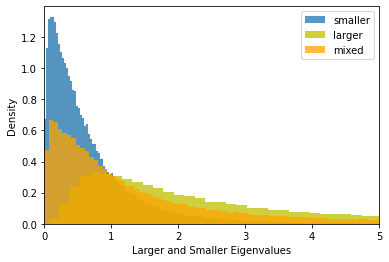

In [20]:
sns.histplot(data=smaller_evs, stat="density")
sns.histplot(data=larger_evs, stat="density", color="y")
sns.histplot(data=all_evs, stat="density", color="orange")
plt.xlim(0, 5)
plt.xlabel("Larger and Smaller Eigenvalues")
plt.legend(["smaller", "larger", "mixed"])